In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import pickle
import copy
%load_ext autoreload
%autoreload 2

use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using CUDA


In [71]:
# load in vgg16 model
if 'heidi' in os.getcwd():
    vgg16 = models.vgg()
    vgg16.load_state_dict(torch.load("C:\Users\heidi/.torch\models\vgg16-397923af.pth"))
else:
    vgg16 = models.vgg16(pretrained=True)

In [65]:
#load pre-trained flooding weights from dataset
pkl_filename = "../features/VGG16_relu5_3.pickle"  
last_layer_weights = {} # pretrained_weights is an empty dict already

if os.path.getsize(pkl_filename) > 0:      
    with open(pkl_filename, "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        last_layer_weights = unpickler.load()

In [154]:
#load in training images

image_dir = "../data/imgs_small/"
data_transforms = {
    'TRAIN': transforms.Compose([
        # Data augmentation is a good practice for the train set
        # Here, we randomly crop the image to 224x224 and
        # randomly flip it horizontally. 
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])
#     ,
#     'VAL': transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#     ]),
#     'TEST': transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#     ])
}

train_set = datasets.ImageFolder(image_dir, data_transforms['TRAIN'])

train_loader = torch.utils.data.DataLoader(
        train_set,
        batch_size=32,
        num_workers=0,
        shuffle=True
    )

example = train_set[0][0]
# next(iter(train_loader))

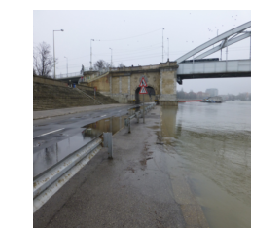

In [155]:
#sanity check: plot images
import imageio
from PIL import Image

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
#     plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

imshow(example)